# 第11章 類神經網路與深度學習

Date     : 2022/09/24,10/01

Author   : Ming-Chang Lee

Email    : alan9956@gmail.com

RWEPA    : http://rwepa.blogspot.tw/

GitHub   : https://github.com/rwepa

Encoding : UTF-8

## 深度學習的演進

In [1]:
# 人工智慧1950 --> 機器學習1980 --> 深度學習2006

## 查詢 tensorflow 版本

In [2]:
conda list tensorflow

# packages in environment at C:\Users\asus\anaconda3\envs\tensorflow:
#
# Name                    Version                   Build  Channel
tensorflow                2.9.1                    pypi_0    pypi
tensorflow-estimator      2.9.0                    pypi_0    pypi
tensorflow-io-gcs-filesystem 0.26.0                   pypi_0    pypi

Note: you may need to restart the kernel to use updated packages.


## 啟動函數 (Activation function)

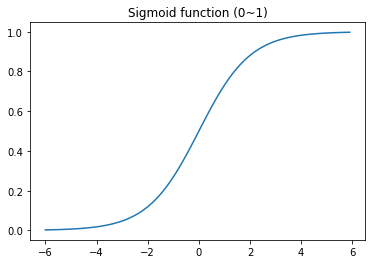

In [3]:
# Sigmoid 函數
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1/(1+(np.e**(-x)))

x = np.arange(-6, 6, 0.1)

plt.plot(x, sigmoid(x))
plt.title("Sigmoid function (0~1)")
plt.show()

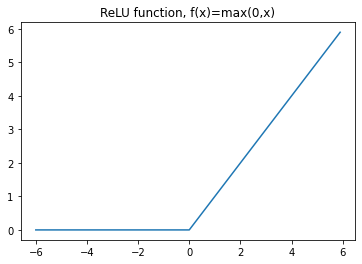

In [4]:
# ReLU 函數
import numpy as np
import matplotlib.pyplot as plt

def relu(x):
    return np.maximum(0, x)

x = np.arange(-6, 6, 0.1)

plt.plot(x, relu(x))
plt.title("ReLU function, f(x)=max(0,x)")
plt.show()

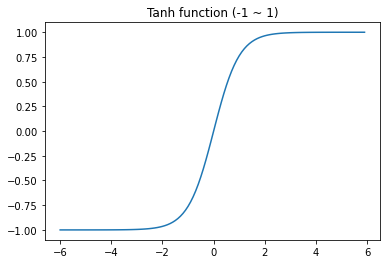

[0.02364054 0.06426166 0.1746813  0.474833   0.02364054 0.06426166
 0.1746813 ]


In [5]:
# Tanh 函數
import numpy as np
import matplotlib.pyplot as plt

def tanh(x):
    return np.tanh(x)

x = np.arange(-6, 6, 0.1)

plt.plot(x, tanh(x))
plt.title("Tanh function (-1 ~ 1)")
plt.show()

# Softmax 函數
import numpy as np

def softmax(x):
    return np.exp(x)/sum(np.exp(x))

x = np.array([1,2,3,4,1,2,3])

y = softmax(x)
print(y)

## iris - 多層感知器(類神經網路)


In [6]:
# 步驟1 載入套件
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [7]:
# 步驟2 資料預處理
np.random.seed(7)  # 指定亂數種子

# 載入資料集
# https://github.com/rwepa/DataDemo/blob/master/iris.csv
# df = pd.read_csv("iris.csv")
urls = "https://raw.githubusercontent.com/rwepa/DataDemo/master/iris.csv"
df = pd.read_csv(urls)
df

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width    Species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]

In [8]:
# one-hot 編碼
target_mapping = {"setosa": 0,
                  "versicolor": 1,
                  "virginica": 2}

df["Species"] = df["Species"].map(target_mapping)

dataset = df.values # 取出資料框的值
np.random.shuffle(dataset)  # 使用亂數打亂資料的列順序

In [9]:
# 分割成特徵資料(X)和標籤資料(Y)
X = dataset[:,0:4].astype(float)
Y = to_categorical(dataset[:,4])

# 特徵標準化
X -= X.mean(axis=0)
X /= X.std(axis=0)

In [10]:
# 分割成訓練和測試資料集
X_train, Y_train = X[:120], Y[:120]     # 訓練資料前120筆
X_test, Y_test = X[120:], Y[120:]       # 測試資料後30筆

In [11]:
# 步驟3 定義模型
# 建立Keras的Sequential模型
# input(4)-->hiden1(6)-->hiden2(6)-->output(3)
# 輸入層 4個特徵
# 第1隱藏層 6個神經元
# 第2隱藏層 6個神經元
# 輸出層 3個神經元

model = Sequential() # 建立 Sequential 物件
model.add(Dense(6, input_shape=(4,), activation="relu"))
model.add(Dense(6, activation="relu"))
model.add(Dense(3, activation="softmax"))
model.summary()   # 顯示模型摘要

# dense (Dense)   : 4*6 + 6 = 30
# dense_1 (Dense) : 6*6 + 6 = 42
# dense_2 (Dense) : 6*3 + 3 = 21
# 合計 = 30 + 42 + 21 = 93

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 30        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 3)                 21        
                                                                 
Total params: 93
Trainable params: 93
Non-trainable params: 0
_________________________________________________________________


In [12]:
# 步驟4 編譯模型

# 編譯模型
# loss 損失函數, optimizer 優化器即梯度下降法, metrics 評估標準
# https://www.tensorflow.org/api_docs/python/tf/keras/optimizers

model.compile(loss="categorical_crossentropy", 
              optimizer="adam",
              metrics=["accuracy"])

In [13]:
# 步驟5 訓練模型
# 需一些時間

# epochs 訓練週期,  batch_size 批次樣本大小

print("Training ...")
model.fit(X_train, Y_train, epochs=100, batch_size=5)

Training ...
Epoch 1/100
24/24 [==============================] - 0s 954us/step - loss: 1.0167 - accuracy: 0.6250
Epoch 2/100
24/24 [==============================] - 0s 785us/step - loss: 0.9759 - accuracy: 0.6333
Epoch 3/100
24/24 [==============================] - 0s 820us/step - loss: 0.9273 - accuracy: 0.6583
Epoch 4/100
24/24 [==============================] - 0s 824us/step - loss: 0.8756 - accuracy: 0.6750
Epoch 5/100
24/24 [==============================] - 0s 761us/step - loss: 0.8189 - accuracy: 0.7000
Epoch 6/100
24/24 [==============================] - 0s 798us/step - loss: 0.7632 - accuracy: 0.7167
Epoch 7/100
24/24 [==============================] - 0s 737us/step - loss: 0.7091 - accuracy: 0.7417
Epoch 8/100
24/24 [==============================] - 0s 768us/step - loss: 0.6607 - accuracy: 0.7500
Epoch 9/100
24/24 [==============================] - 0s 781us/step - loss: 0.6159 - accuracy: 0.7583
Epoch 10/100
24/24 [==============================] - 0s 741us/step - loss: 0.

24/24 [==============================] - 0s 694us/step - loss: 0.0649 - accuracy: 0.9833
Epoch 82/100
24/24 [==============================] - 0s 738us/step - loss: 0.0643 - accuracy: 0.9750
Epoch 83/100
24/24 [==============================] - 0s 672us/step - loss: 0.0633 - accuracy: 0.9750
Epoch 84/100
24/24 [==============================] - 0s 737us/step - loss: 0.0621 - accuracy: 0.9750
Epoch 85/100
24/24 [==============================] - 0s 686us/step - loss: 0.0613 - accuracy: 0.9750
Epoch 86/100
24/24 [==============================] - 0s 694us/step - loss: 0.0609 - accuracy: 0.9833
Epoch 87/100
24/24 [==============================] - 0s 694us/step - loss: 0.0592 - accuracy: 0.9750
Epoch 88/100
24/24 [==============================] - 0s 701us/step - loss: 0.0615 - accuracy: 0.9750
Epoch 89/100
24/24 [==============================] - 0s 694us/step - loss: 0.0584 - accuracy: 0.9833
Epoch 90/100
24/24 [==============================] - 0s 650us/step - loss: 0.0581 - accuracy: 

In [14]:
# 步驟6 評估與儲存模型

# 評估模型
print("\nTesting ...")
loss, accuracy = model.evaluate(X_test, Y_test)
print("準確度 = {:.2f}".format(accuracy))


Testing ...
1/1 [==============================] - 0s 144ms/step - loss: 0.1169 - accuracy: 0.9000
準確度 = 0.90


In [15]:
# 儲存 Keras 模型
print("Saving Model: iris.h5 ...")
model.save("iris.h5")

Saving Model: iris.h5 ...


In [16]:
# 使用儲存模型進行預測
from tensorflow import keras

model = Sequential()
model = keras.models.load_model("iris.h5")
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [17]:
loss, accuracy = model.evaluate(X_test, Y_test)
print("測試資料集的準確度 = {:.2f}".format(accuracy))

1/1 [==============================] - 0s 229ms/step - loss: 0.1169 - accuracy: 0.9000
測試資料集的準確度 = 0.90


In [18]:
# AttributeError: 'Sequential' object has no attribute 'predict_classes'
# Y_pred = model.predict_classes(X_test)

In [19]:
# 修正為 model.predict()
predict_x = model.predict(X_test)
Y_pred = np.argmax(predict_x, axis=1)

1/1 [==============================] - 0s 87ms/step


In [20]:
print(Y_pred)

[0 1 1 2 2 1 1 0 1 1 0 0 0 1 1 0 2 2 2 2 0 2 1 2 0 2 1 2 1 0]


In [21]:
Y_target = dataset[:,4][120:].astype(int)
print(Y_target)

[0 1 1 2 2 1 2 0 1 1 0 0 0 1 1 0 2 2 1 2 0 2 1 1 0 2 1 2 1 0]


In [22]:
# 混淆矩陣 (Confusion Matrix)
cm = pd.crosstab(Y_target,
                 Y_pred,
                 rownames=["Actual"],
                 colnames=["Predict"])
print(cm)

Predict  0   1  2
Actual           
0        9   0  0
1        0  10  2
2        0   1  8


## MLP視覺化 VisualizeNN 程式

In [23]:
# 步驟1:安裝 palettable 套件: Color Palettes for Python
# conda install palettable

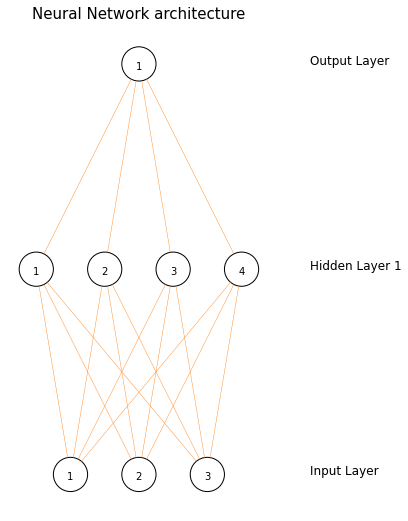

In [24]:
# 步驟2:下載 VisualizeNN.py
# https://github.com/jzliu-100/visualize-neural-network
# 下載 https://github.com/jzliu-100/visualize-neural-network/blob/master/VisualizeNN.py
# 將 "VisualizeNN.py" 檔案置於 .py 或 .ipynb 之工作目錄

import VisualizeNN as VisNN
network = VisNN.DrawNN([3,4,1])
network.draw()

In [25]:
##############################
# 資料處理-轉換為samples
##############################
# 時間序列 [10,20,30,40,50,60,70,80,90]
# X,
# 10,20,30  40
# 20,30,40  50
# 30,40,50  60
# 40,50,60  70
# 50,60,70  80
# 60,70,80  90
# 70,80,90  ?

from numpy import array

In [26]:
# 將資料轉換成 samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        
        # find the end of this pattern
        end_ix = i + n_steps
        
        # check if we are beyond the sequence

        if end_ix > len(sequence)-1:
            break

        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
        return array(X), array(y)

In [27]:
# 建立時間序列
raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]

In [28]:
# 輸入: three time steps
# 輸出: one time step (one-step) 預測
n_steps = 3

In [29]:
# 將資料轉換為 samples
X, y = split_sequence(raw_seq, n_steps)
X
y

array([40])

In [30]:
# summarize the data
for i in range(len(X)):
    print(X[i], y[i])

[10 20 30] 40


In [31]:
##############################
# 建立模型與預測
##############################

# MLP應用
from numpy import array
from keras.models import Sequential
from keras.layers import Dense

In [32]:
# 定義模型
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=3))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [33]:
# fit model
# verbose=0 will show you nothing (silent)
# verbose=1 will show you an animated progress bar
# verbose=2 will just mention the number of epoch

model.fit(X, y, epochs=2000, verbose=0)

In [34]:
# 預測
x_input = array([70, 80, 90])
x_input = x_input.reshape((1, 3))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[142.74178]]


# 深度學習 CNN

In [35]:
# https://www.tensorflow.org/tutorials/images/cnn

# CIFAR10 資料集
# https://www.cs.toronto.edu/~kriz/cifar.html

# 圖片區分為10類: airplane, automobile, bird,...
# 每一類別有 6000張 圖片, 共 60000張圖片, 每張圖片大小 32*32

# 使用 Keras Sequential API
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# 60,000 color images in 10 classes, with 6,000 images in each class. 
# The dataset is divided into 50,000 training images and 10,000 testing images. 

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [36]:
# 檢視資料大小
print(train_images.shape) # (50000, 32, 32, 3)
print(train_labels.shape) # (50000, 1)
print(test_images.shape) # (10000, 32, 32, 3)
print(test_labels.shape) # (10000, 1)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [37]:
# 檢視第1張圖片, 3維陣列
tmp = train_images[0]
print(tmp)

print(train_labels[0]) # 6 --> frog

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]
[6]


In [38]:
# 標準化為 0~1
train_images, test_images = train_images / 255.0, test_images / 255.0

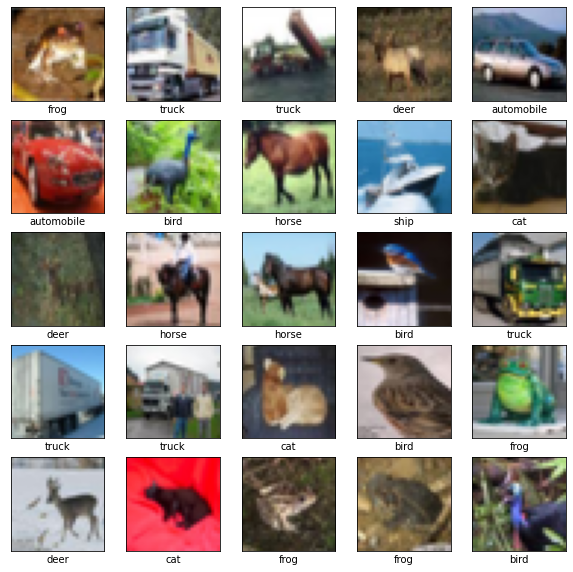

In [39]:
# 繪圖
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])

In [40]:
# 建立 CNN 模型

# 輸入層      input(32, 32, 3)
# 第1次卷積層  Conv2D(32, 3, 3)
# 第1次池化層  MaxPooling2D (2,2)
# 第2次卷積層  Conv2D(64, 3, 3)
# 第2次池化層  MaxPooling2D (2,2)
# 第3次卷積層  Conv2D(64, 3, 3)

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [41]:
# 模型架構
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-trai

In [42]:
# 建立平坦層, 將特徵值轉為一維資料以供後續的全連結層(隱藏層)使用
model.add(layers.Flatten())

In [43]:
# 建立隱藏層
model.add(layers.Dense(64, activation='relu'))

In [44]:
# 建立輸出層
model.add(layers.Dense(10))

In [45]:
# 模型摘要
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)             

In [46]:
# 編譯與訓練模型
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [47]:
# 需要一些時間
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 30s 19ms/step - loss: 1.5506 - accuracy: 0.4276 - val_loss: 1.2465 - val_accuracy: 0.5521
Epoch 2/10
1563/1563 [==============================] - 35s 23ms/step - loss: 1.1680 - accuracy: 0.5853 - val_loss: 1.1385 - val_accuracy: 0.5997
Epoch 3/10
1563/1563 [==============================] - 35s 23ms/step - loss: 1.0119 - accuracy: 0.6450 - val_loss: 1.0319 - val_accuracy: 0.6435
Epoch 4/10
1563/1563 [==============================] - 45s 29ms/step - loss: 0.9176 - accuracy: 0.6791 - val_loss: 0.9312 - val_accuracy: 0.6734
Epoch 5/10
1563/1563 [==============================] - 47s 30ms/step - loss: 0.8494 - accuracy: 0.7017 - val_loss: 0.9304 - val_accuracy: 0.6733
Epoch 6/10
1563/1563 [==============================] - 49s 31ms/step - loss: 0.7879 - accuracy: 0.7244 - val_loss: 0.9951 - val_accuracy: 0.6583
Epoch 7/10
1563/1563 [==============================] - 48s 31ms/step - loss: 0.7370 - accuracy: 0.7421 - val_loss: 0.8872 -

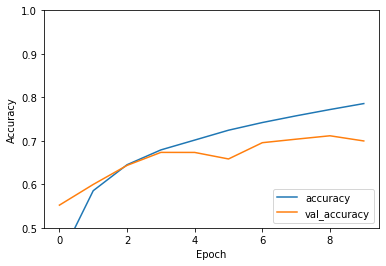

In [48]:
# 評估模型(訓練集與驗證集準確率)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [49]:
# 測試集準確度
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc) # 70%

313/313 - 3s - loss: 0.8885 - accuracy: 0.6997 - 3s/epoch - 9ms/step
0.6996999979019165


# 12.案例實作練習

In [50]:
# 圖像分類 (Image classification)
# https://www.tensorflow.org/tutorials/images/classification
# 恭喜您, 開啟人生 Python 學習之旅 ^_^